<h1 style="color: green;">TASK- 2</h1>

<h1 style="color: green;">DATA PRE-PROCESSING</h1>

<h1 style="color: black;">AIM</h1>

Aim of this task is to conduct preprocessing on a random dataset which enables to prepare raw data for analysis and modeling in a way that enhances the quality and performance of machine learning models.

<h1 style="color: black;">Importing Necessary Libraries</h1>

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler # for standard scaling of features

<h1 style="color: black">Load the Dataset</h1>

DATA DESCRIPTION:

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

VARIABLES DESCRIPTION:

Pregnancies Number of times pregnant
Glucose Plasma glucose concentration in an oral glucose tolerance test
BloodPressure Diastolic blood pressure (mm Hg)
SkinThickness Triceps skinfold thickness (mm)
Insulin Two hour serum insulin
BMI Body Mass Index
DiabetesPedigreeFunction Diabetes pedigree nunction
Age Age in years
Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0.

In [27]:
df=pd.read_csv("Diabetesdata.csv")
df.head() # To view the first few rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


<h1 style="color: black;">Handling Missing values</h1>

In [28]:
missing_values=df.isnull()
print(missing_values)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [29]:
#count missing values in each column
missingcount_column=df.isnull().sum()
print(missingcount_column)

Pregnancies                 0
Glucose                     0
BloodPressure               2
SkinThickness               3
Insulin                     1
BMI                         3
DiabetesPedigreeFunction    3
Age                         0
Outcome                     0
dtype: int64


In [30]:
#Filling missing values
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].mean(), inplace=True)


In [31]:
df_cleaned = df.dropna()
df_cleaned_columns = df.dropna(axis=1, how='all')

In [32]:
print(df_cleaned_columns)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0           35.0      0.0  33.6   
1              1       85           66.0           29.0      0.0  26.6   
2              8      183           64.0            0.0      0.0  23.3   
3              1       89           66.0           23.0     94.0  28.1   
4              0      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0           48.0    180.0  32.9   
764            2      122           70.0           27.0      0.0  36.8   
765            5      121           72.0           23.0    112.0  26.2   
766            1      126           60.0            0.0      0.0  30.1   
767            1       93           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

<h1 style="color: black;">Handling Outliers</h1>

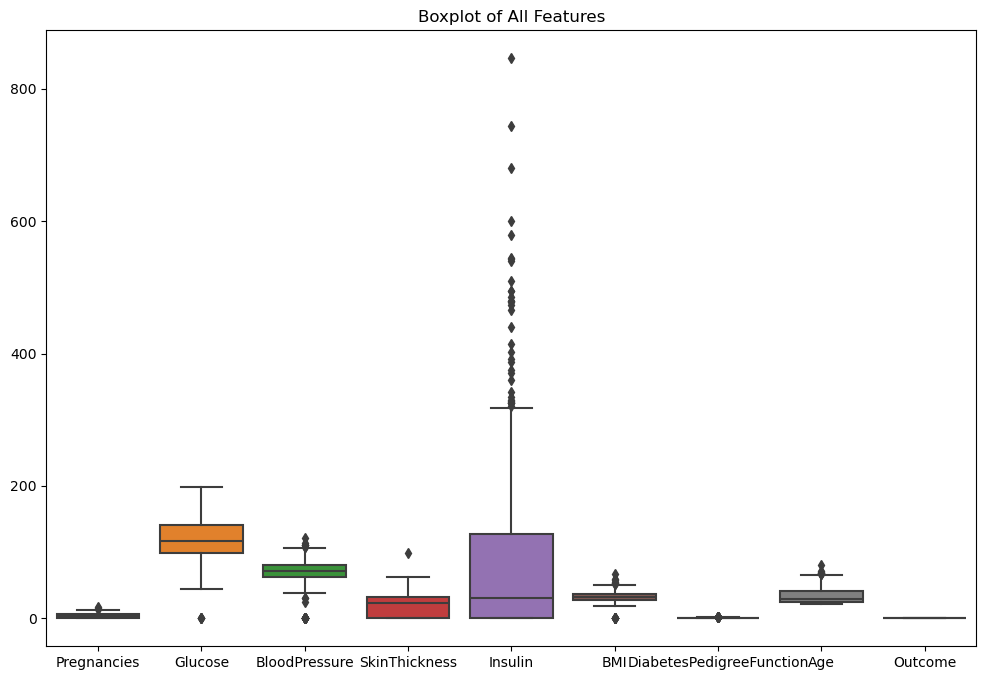

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of All Features')
plt.show()

In [34]:
z_scores = np.abs(stats.zscore(df))
outliers_z = (z_scores > 3).any(axis=1)
print("Outliers using Z-score method:")
print(df[outliers_z])

# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("\nOutliers using IQR method:")
print(df[outliers_iqr.any(axis=1)])

Outliers using Z-score method:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137           40.0           35.0    168.0  43.1   
7             10      115            0.0            0.0      0.0  35.3   
8              2      197           70.0           45.0    543.0  30.5   
9              8      125           96.0            0.0      0.0   0.0   
13             1      189           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
695            7      142           90.0           24.0    480.0  30.4   
697            0       99            0.0            0.0      0.0  25.0   
703            2      129            0.0            0.0      0.0  38.5   
706           10      115            0.0            0.0      0.0   0.0   
753            0      181           88.0           44.0    510.0  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33

<h1 style="color: black;">Normalizing And Scaling Features</h1>

In [35]:
# Separate features and target
X = df.drop('Outcome', axis=1)  # Replace 'target_column' with your target column name
y = df['Outcome']  # Replace 'target_column' with your target column name

#StandardScaler (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)



[[ 0.63994726  0.84832379  0.14998902 ...  0.20792745  0.46948043
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.1602493  ... -0.68212169 -0.36466156
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26366208 ... -1.10171629  0.60548184
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14998902 ... -0.73298164 -0.68502044
  -0.27575966]
 [-0.84488505  0.1597866  -0.47048763 ... -0.23709712 -0.37070607
   1.17073215]
 [-0.84488505 -0.8730192   0.04657625 ... -0.19895216 -0.47346269
  -0.87137393]]


<h1 style="color: whitw;">Splitting Data into Training And Testing Datasets</h1>

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Printing the results to verify
print("Training features:\n", X_train)
print("Testing features:\n", X_test)
print("Training labels:\n", y_train)
print("Testing labels:\n", y_test)

Training features:
 [[-5.47918591e-01 -1.15469351e+00 -3.57287087e+00 ... -4.06430842e+00
  -5.06707480e-01 -1.04154944e+00]
 [ 1.53084665e+00 -2.78373437e-01  6.67052900e-01 ... -4.78681890e-01
   2.44905652e+00  1.42599540e+00]
 [-8.44885053e-01  5.66649487e-01 -1.19437705e+00 ... -4.15106952e-01
   5.51081274e-01 -9.56461683e-01]
 ...
 [ 1.82781311e+00 -6.22642036e-01  8.73878450e-01 ...  1.73372597e+00
   2.00780750e+00  4.04942367e-01]
 [-1.14185152e+00  6.29243777e-01 -3.57287087e+00 ...  1.32684636e+00
  -8.05910585e-01 -3.60847411e-01]
 [-1.14185152e+00  1.28489452e-01  1.39094232e+00 ... -1.20343619e+00
  -1.67768776e-16 -1.04154944e+00]]
Testing features:
 [[ 6.39947260e-01 -7.16533472e-01 -5.73900400e-01 ...  2.58787397e-01
  -1.25903529e-01  8.30381132e-01]
 [-5.47918591e-01 -2.78373437e-01  3.05108187e-01 ...  4.74942188e-01
  -9.78179039e-01 -1.04154944e+00]
 [-5.47918591e-01 -4.03562018e-01 -2.63662075e-01 ... -1.48092210e-01
  -9.47956503e-01 -1.04154944e+00]
 ...
 [ 1.

<h1 style="color: black;">CONCLUSIONS</h1>


Data preprocessing is a critical step in the data science and machine learning pipeline. It involves cleaning, transforming, and organizing raw data to make it suitable for analysis and modeling. Effective preprocessing ensures that the data is of high quality, leading to more accurate and reliable models.

Data Cleaning:
Handling missing values and duplicates is essential to avoid biases and inaccuracies in the analysis.
Correcting errors in the dataset ensures that the information used is accurate and reliable.

Data Transformation:
Scaling and normalization put features on a similar scale, improving the performance and stability of models.
Feature engineering creates new, meaningful features that can enhance model performance.

Handling Outliers:
Identifying and managing outliers is crucial because they can skew the results and reduce the performance of models.
Techniques such as Z-score and IQR help in effectively detecting and addressing outliers.

Data Splitting:
Splitting the dataset into training and testing sets allows for the evaluation of the model’s performance on unseen data, ensuring that it generalizes well.



